In [111]:
# default_exp datasets
# hide
from nbdev.showdoc import *
import numpy as np
import torch
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from directed_graphs.datasets import DirectedStochasticBlockModel
from directed_graphs.datasets import DirectedStochasticBlockModelHelper
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Here, we will test node2vec on various directed graphs and visualize using PHATE and PCA.

Let's create functions for running node2vec and using PHATE and PCA visualizations

In [112]:
def get_node2vec_embeddings(num_nodes: int, num_clusters: int, edge_index: np.ndarray, undir_prob = [0.4], dir_prob = [0.9], directed=False):
    '''
    Takes in parameters for DirectedStochasticBlockModelHelper to create a graph, 
    and then conducts node2vec and returns the embedding
    Inputs: num_nodes (number of nodes in the graph), num_clusters (number of 
    clusters in the graph), edge_index (indexes of the edges going from the 
    first row to the second row)
    Returns: vector embeddings
    '''
    # create graph
    datasets = DirectedStochasticBlockModelHelper(num_nodes, num_clusters, edge_index)
    data = datasets[0]
    sparse_A = torch.sparse_coo_tensor(data.edge_index, torch.ones(data.edge_index.shape[1]))
    A = sparse_A.to_dense()
    plt.imshow(A)
    # convert graph to networkx so it can be used by node2vec
    import networkx as nx
    from torch_geometric.utils import to_networkx
    G_nx = to_networkx(data, to_undirected=directed) # default directed=False
    import node2vec
    from node2vec import Node2Vec

    # embed nodes
    node2vec = Node2Vec(G_nx, dimensions=64, walk_length=30, num_walks=200, workers=4)
    model = node2vec.fit(window=10, min_count=1, batch_words=4)
    # identify most similar nodes
    model.wv.most_similar('2')  # output node names are always strings

    # extract embeddings
    wordlist = [str(i) for i in range(num_nodes)]
    word2vec_embeddings = model.wv[wordlist]
    return word2vec_embeddings


In [113]:
def visualize_phate(word2vec_embeddings, num_clusters):
    # PHATE visualization
    import phate
    phate_op = phate.PHATE()
    data_phate = phate_op.fit_transform(word2vec_embeddings)
    n, d = data_phate.shape
    clusters = np.repeat(list(range(num_clusters)), n/num_clusters)
    phate.plot.scatter(data_phate[:,0],data_phate[:,1],c=clusters)

In [114]:
def visualize_pca(word2vec_embeddings, num_clusters):
    # PCA visualization
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(word2vec_embeddings)
    n, d = pcs.shape
    clusters = np.repeat(list(range(num_clusters)), n/num_clusters)
    plt.scatter(pcs[:,0],pcs[:,1],c=clusters)

# Test Example

Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:03<00:00, 13.94it/s]


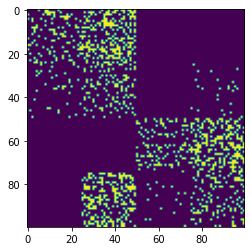

In [115]:
num_clusters = 4
word2vec_embeddings = get_node2vec_embeddings(100, num_clusters, np.array([[0,2,3],[1,3,1]]))

Calculating PHATE...
  Running PHATE on 100 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.02 seconds.
  Calculating optimal t...
    Automatically selected t = 10
  Calculated optimal t in 0.02 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.01 seconds.
Calculated PHATE in 0.06 seconds.


/var/folders/gn/73_fmpdj145fx4w0pz72956c0000gn/T/ipykernel_82668/1042417227.py:8: DeprecationWarning: Call to deprecated function (or staticmethod) scatter. (Use scprep.plot.scatter instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter(data_phate[:,0],data_phate[:,1],c=clusters)
/Users/joiazhang/opt/anaconda3/envs/plswork/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


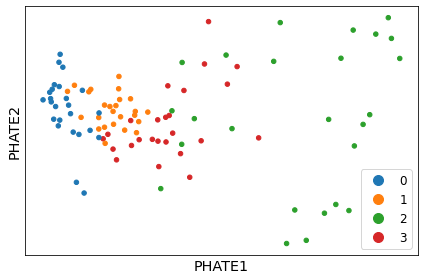

In [116]:
visualize_phate(word2vec_embeddings, num_clusters)

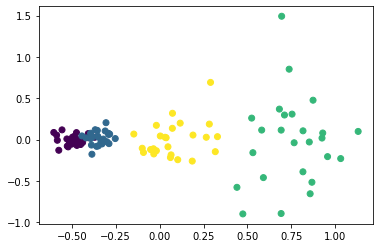

In [117]:
visualize_pca(word2vec_embeddings, num_clusters)

# 1a: Two Clusters Directed

Computing transition probabilities:   0%|          | 0/40 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 54.07it/s]


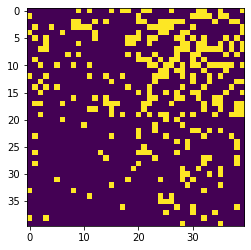

In [118]:
num_clusters = 2
word2vec_embeddings = get_node2vec_embeddings(40, num_clusters, np.array([[0],[1]]))

Calculating PHATE...
  Running PHATE on 40 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.05 seconds.
  Calculating optimal t...
    Automatically selected t = 8
  Calculated optimal t in 0.24 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.01 seconds.
Calculated PHATE in 0.35 seconds.


/var/folders/gn/73_fmpdj145fx4w0pz72956c0000gn/T/ipykernel_82668/1042417227.py:8: DeprecationWarning: Call to deprecated function (or staticmethod) scatter. (Use scprep.plot.scatter instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter(data_phate[:,0],data_phate[:,1],c=clusters)
/Users/joiazhang/opt/anaconda3/envs/plswork/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


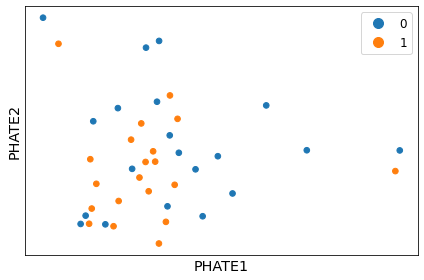

In [119]:
visualize_phate(word2vec_embeddings, num_clusters)

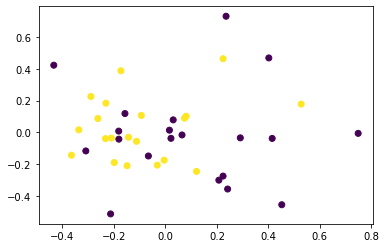

In [120]:
visualize_pca(word2vec_embeddings, num_clusters)

# 1b: Two Clusters Undirected

Computing transition probabilities:   0%|          | 0/40 [00:00<?, ?it/s]

Generating walks (CPU: 3): 100%|██████████| 50/50 [00:02<00:00, 21.34it/s]


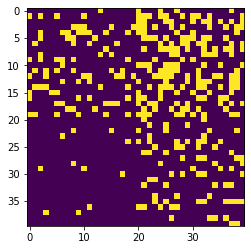

In [121]:
num_clusters = 2
word2vec_embeddings = get_node2vec_embeddings(40, num_clusters, np.array([[0],[1]]), directed=True)

Calculating PHATE...
  Running PHATE on 40 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 9
  Calculated optimal t in 0.02 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.06 seconds.


/var/folders/gn/73_fmpdj145fx4w0pz72956c0000gn/T/ipykernel_82668/1042417227.py:8: DeprecationWarning: Call to deprecated function (or staticmethod) scatter. (Use scprep.plot.scatter instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter(data_phate[:,0],data_phate[:,1],c=clusters)
/Users/joiazhang/opt/anaconda3/envs/plswork/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


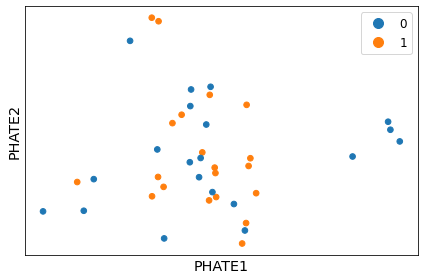

In [122]:
visualize_phate(word2vec_embeddings, num_clusters)

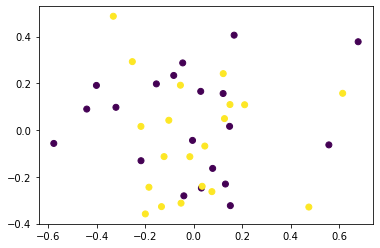

In [123]:
visualize_pca(word2vec_embeddings, num_clusters)

# 2a Three Clusters Directed

Computing transition probabilities:   0%|          | 0/60 [00:00<?, ?it/s]

Generating walks (CPU: 3): 100%|██████████| 50/50 [00:01<00:00, 38.00it/s]


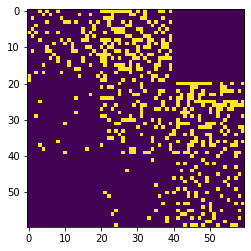

In [124]:
num_clusters = 3
word2vec_embeddings = get_node2vec_embeddings(60, num_clusters, np.array([[0,1],[1,2]]))

Calculating PHATE...
  Running PHATE on 60 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating optimal t...
    Automatically selected t = 10
  Calculated optimal t in 0.02 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.06 seconds.


/var/folders/gn/73_fmpdj145fx4w0pz72956c0000gn/T/ipykernel_82668/1042417227.py:8: DeprecationWarning: Call to deprecated function (or staticmethod) scatter. (Use scprep.plot.scatter instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter(data_phate[:,0],data_phate[:,1],c=clusters)
/Users/joiazhang/opt/anaconda3/envs/plswork/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


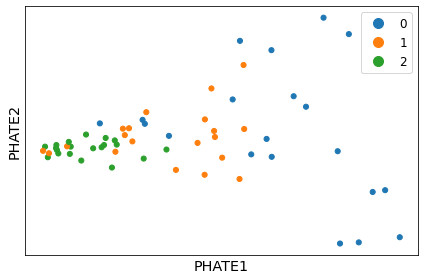

In [125]:
visualize_phate(word2vec_embeddings, num_clusters)

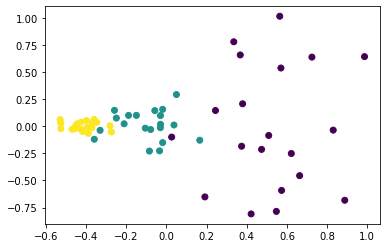

In [126]:
visualize_pca(word2vec_embeddings, num_clusters)

# 3a: Four Clusters Directed

Computing transition probabilities:   0%|          | 0/80 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:01<00:00, 28.77it/s]


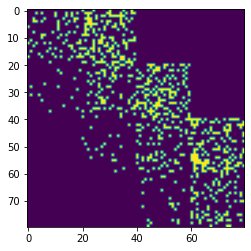

In [127]:
num_clusters = 4
word2vec_embeddings = get_node2vec_embeddings(80, num_clusters, np.array([[0,1,2],[1,2,3]]))

Calculating PHATE...
  Running PHATE on 80 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.02 seconds.
  Calculating optimal t...
    Automatically selected t = 8
  Calculated optimal t in 0.02 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.01 seconds.
Calculated PHATE in 0.08 seconds.


/var/folders/gn/73_fmpdj145fx4w0pz72956c0000gn/T/ipykernel_82668/1042417227.py:8: DeprecationWarning: Call to deprecated function (or staticmethod) scatter. (Use scprep.plot.scatter instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter(data_phate[:,0],data_phate[:,1],c=clusters)
/Users/joiazhang/opt/anaconda3/envs/plswork/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


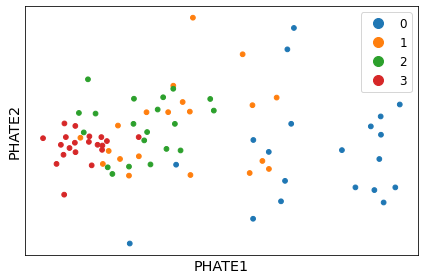

In [128]:
visualize_phate(word2vec_embeddings, num_clusters)

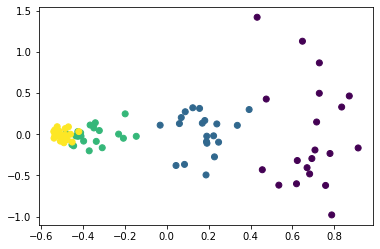

In [129]:
visualize_pca(word2vec_embeddings, num_clusters)